In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.arima_model import ARIMA

In [2]:
data = pd.read_csv('exchange_rate.csv')

In [3]:
data

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [4]:
data.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


### EDA

In [5]:
data.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


In [7]:
data.dtypes

date        object
Ex_rate    float64
dtype: object

In [8]:
data.isnull().sum()

date       0
Ex_rate    0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
import pandas as pd

# data = {'date': ["13-01-1990 00:00", "14-01-1990 01:00"]}
df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'], format="%d-%m-%Y %H:%M")

print(df)


           date   Ex_rate
0    1990-01-01  0.785500
1    1990-01-02  0.781800
2    1990-01-03  0.786700
3    1990-01-04  0.786000
4    1990-01-05  0.784900
...         ...       ...
7583 2010-10-06  0.718494
7584 2010-10-07  0.721839
7585 2010-10-08  0.723197
7586 2010-10-09  0.720825
7587 2010-10-10  0.720825

[7588 rows x 2 columns]


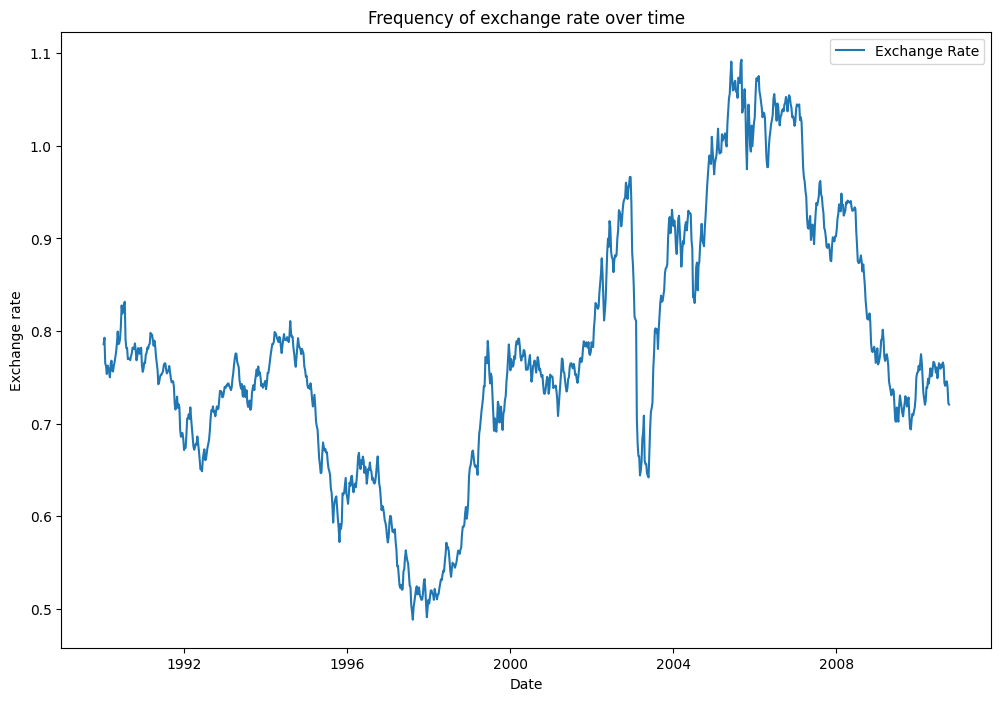

In [11]:
# Plot the time series for exchange rate
df.set_index('date', inplace = True)
df.index = pd.to_datetime(df.index)
df_resampled = df.resample('W').mean()  # Resample to weekly frequency
df_resampled.dropna(inplace=True)
plt.figure(figsize=(12, 8))
plt.plot(df_resampled, label = 'Exchange Rate')
plt.title('Frequency of exchange rate over time')
plt.xlabel('Date')
plt.ylabel('Exchange rate')
plt.legend()
plt.show()

In [12]:
df.index

DatetimeIndex(['1990-01-01', '1990-01-02', '1990-01-03', '1990-01-04',
               '1990-01-05', '1990-01-06', '1990-01-07', '1990-01-08',
               '1990-01-09', '1990-01-10',
               ...
               '2010-10-01', '2010-10-02', '2010-10-03', '2010-10-04',
               '2010-10-05', '2010-10-06', '2010-10-07', '2010-10-08',
               '2010-10-09', '2010-10-10'],
              dtype='datetime64[ns]', name='date', length=7588, freq=None)

In [13]:
#df.index = pd.to_datetime(df.index, format='%Y-%m-%d')
#df.index.freq = 'D'  # Set the frequency of the index to 'D' for daily data
sea = seasonal_decompose(df['Ex_rate'], model = 'multiplicative', period = 365)

<Axes: xlabel='date'>

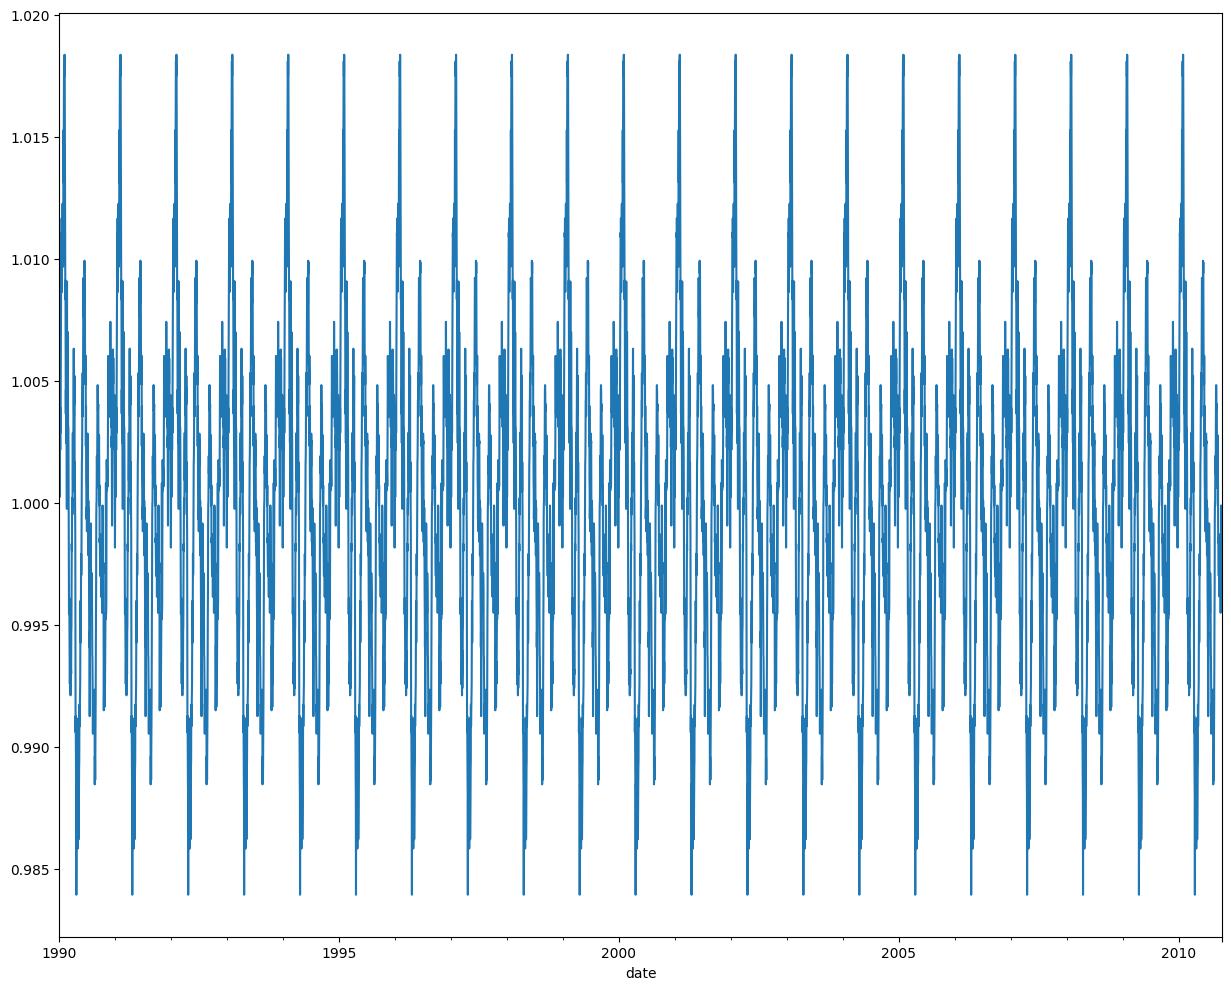

In [14]:
sea.seasonal.plot(figsize = (15,12))

<Axes: xlabel='date'>

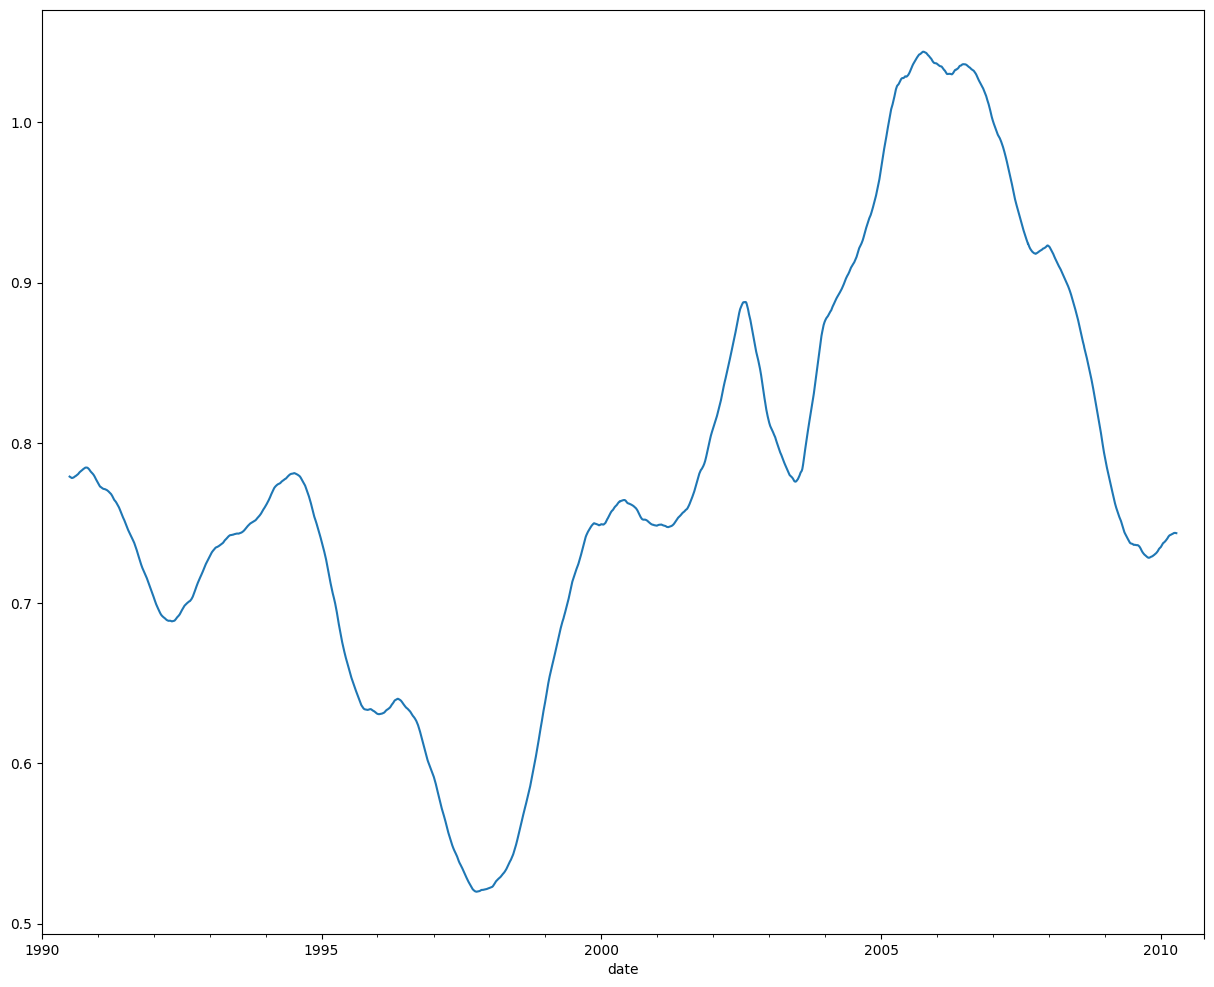

In [15]:
sea.trend.plot(figsize = (15,12))

<Axes: xlabel='date'>

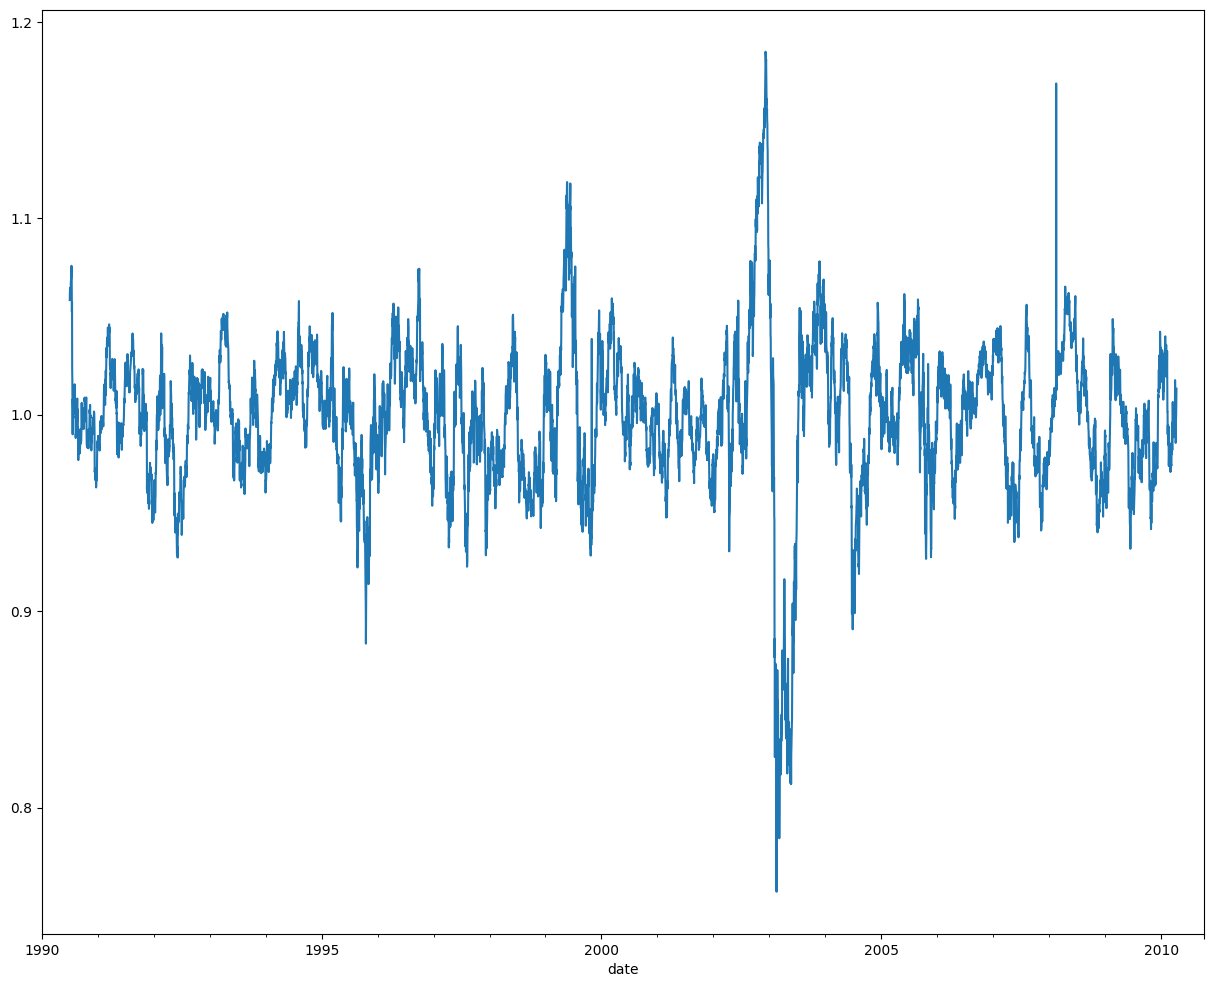

In [16]:
sea.resid.plot(figsize = (15,12))

In [17]:
ts_data = df['Ex_rate']

In [18]:
ts_data_log = np.log(ts_data)

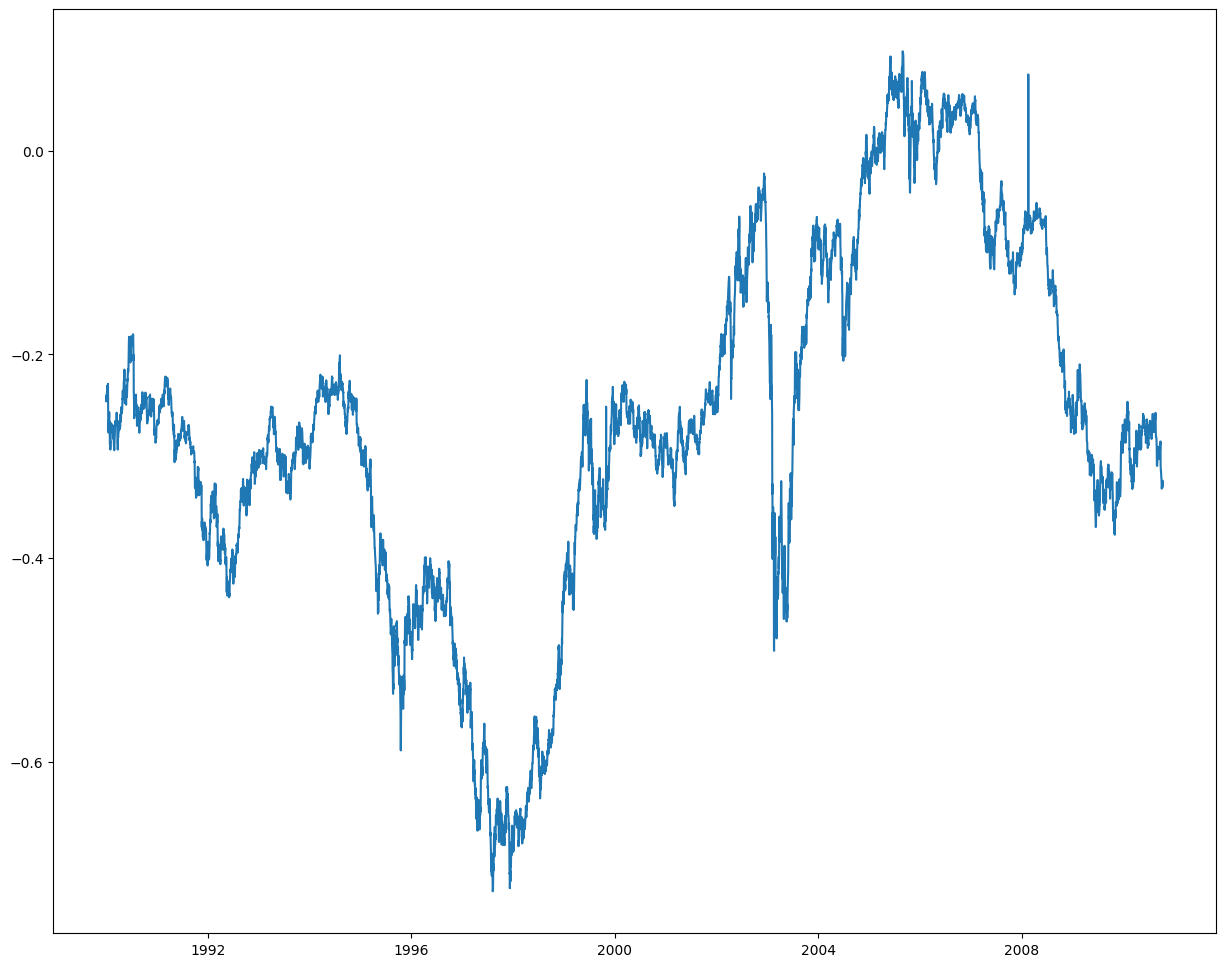

In [19]:
plt.figure(figsize=(15,12))
plt.plot(ts_data_log)

In [20]:
def test_stationarity(timeseries):

    #Calculate rolling mean and rolling standard deviation
    rolmean = timeseries.rolling(window = 12).mean()
    rolstd = timeseries.rolling(window = 12).std()

    original = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    std = plt.plot(rolstd, color = 'green', label = 'Rolling Std')
    plt.legend(loc='best')


    print('Results of Dickey-Fuller Test :\n')
    df_test = adfuller(timeseries)
    my_output = pd.Series(df_test[0:4], index =['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for i,j in df_test[4].items(): # type: ignore
        my_output['Critical Value (%s)'%i] =j
    print(my_output)

Results of Dickey-Fuller Test :

Test Statistic                   -1.664994
p-value                           0.449233
#Lags Used                        1.000000
Number of Observations Used    7586.000000
Critical Value (1%)              -3.431212
Critical Value (5%)              -2.861921
Critical Value (10%)             -2.566973
dtype: float64


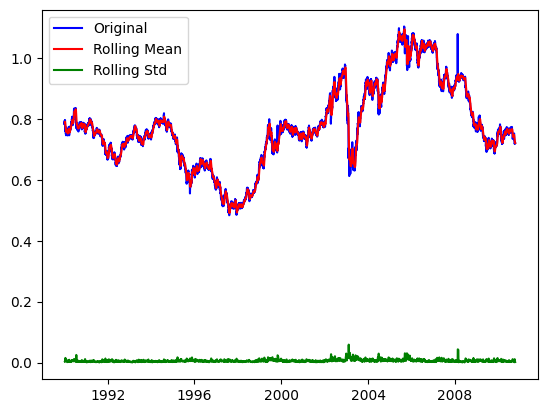

In [21]:
test_stationarity(df['Ex_rate'])

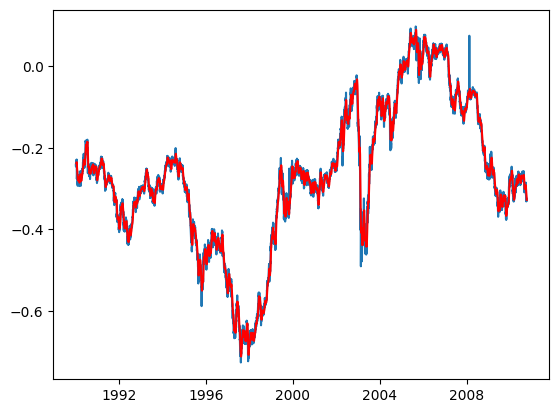

In [22]:
movingAverage = ts_data_log.rolling(window = 12).mean() # type: ignore
movingSTD = ts_data_log.rolling(window = 12).std() # type: ignore
plt.plot(ts_data_log)
plt.plot(movingAverage,color='red')

In [23]:
ts_data_log_diff = ts_data_log - movingAverage
ts_data_log_diff.head(15)

date
1990-01-01         NaN
1990-01-02         NaN
1990-01-03         NaN
1990-01-04         NaN
1990-01-05         NaN
1990-01-06         NaN
1990-01-07         NaN
1990-01-08         NaN
1990-01-09         NaN
1990-01-10         NaN
1990-01-11         NaN
1990-01-12    0.007278
1990-01-13    0.005678
1990-01-14    0.006632
1990-01-15   -0.017983
Name: Ex_rate, dtype: float64

In [24]:
ts_data_log_diff.dropna(inplace=True)
ts_data_log_diff.shape

(7577,)

Results of Dickey-Fuller Test :

Test Statistic                -1.404275e+01
p-value                        3.281274e-26
#Lags Used                     2.900000e+01
Number of Observations Used    7.547000e+03
Critical Value (1%)           -3.431217e+00
Critical Value (5%)           -2.861923e+00
Critical Value (10%)          -2.566974e+00
dtype: float64


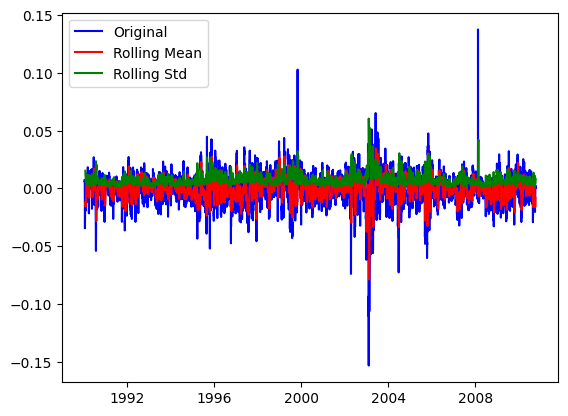

In [25]:
test_stationarity(ts_data_log_diff)

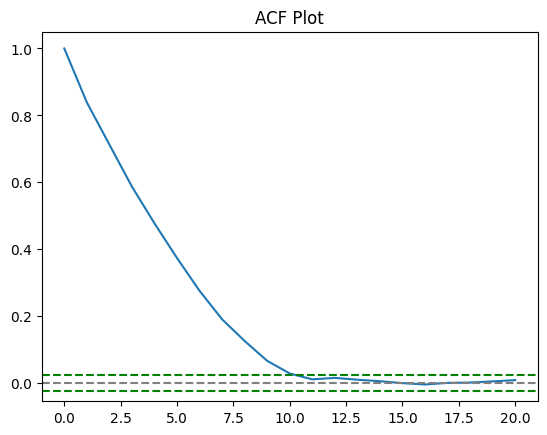

In [26]:
# Plotting the ACF curve

plt.plot(np.arange(0,21), acf(ts_data_log_diff, nlags = 20))
plt.axhline(y=0, linestyle = '--', color = 'gray')

#Confidence intervals
plt.axhline(y=-1.96/np.sqrt(len(ts_data_log_diff)), linestyle = '--', color = 'green')
plt.axhline(y=1.96/np.sqrt(len(ts_data_log_diff)), linestyle = '--', color = 'green')
plt.title('ACF Plot')
plt.show()

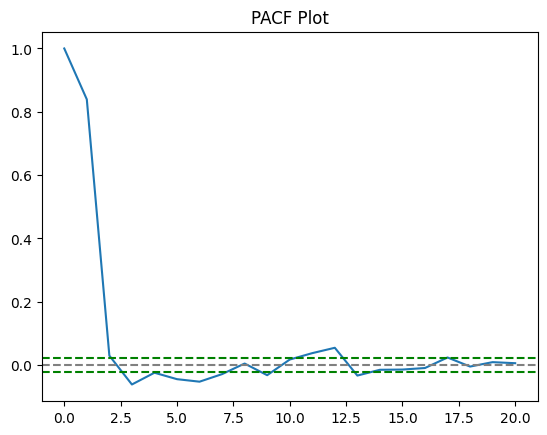

In [27]:
# Plotting the PACF curve

plt.plot(np.arange(0,21), pacf(ts_data_log_diff, nlags = 20))
plt.axhline(y=0, linestyle = '--', color = 'gray')

#Confidence intervals
plt.axhline(y=-1.96/np.sqrt(len(ts_data_log_diff)), linestyle = '--', color = 'green')
plt.axhline(y=1.96/np.sqrt(len(ts_data_log_diff)), linestyle = '--', color = 'green')
plt.title('PACF Plot')
plt.show()

In [28]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['Ex_rate'], order=(1,1,1))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [29]:
result = model.fit()

<Axes: xlabel='date'>

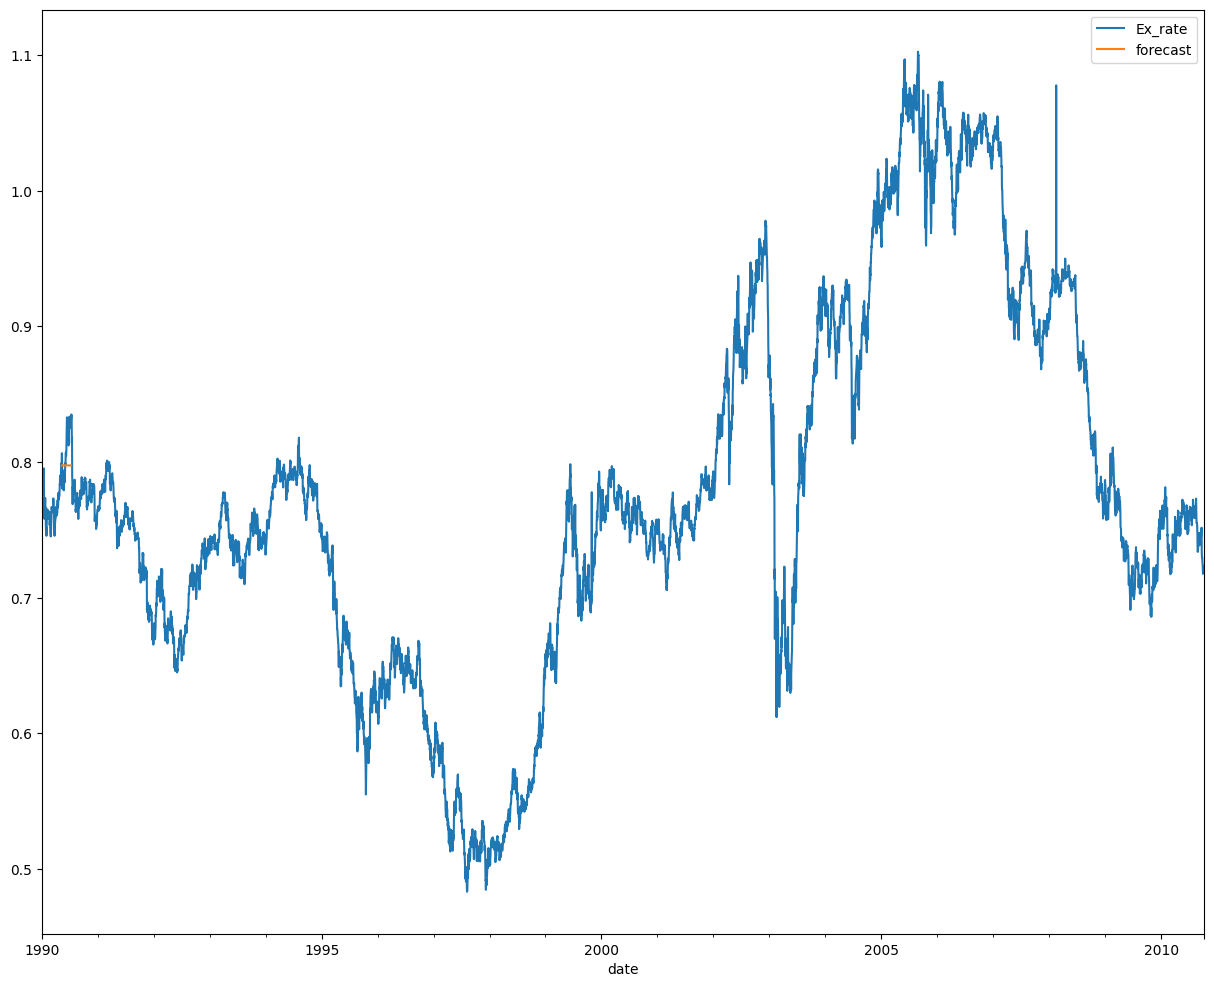

In [30]:
df['forecast']= result.predict(start=130,end=190,dynamic=True)
df[['Ex_rate','forecast']].plot(figsize=(15,12))

In [31]:
result.predict()

1990-01-01    0.000000
1990-01-02    0.785500
1990-01-03    0.782286
1990-01-04    0.786058
1990-01-05    0.786089
                ...   
2010-10-06    0.718837
2010-10-07    0.718522
2010-10-08    0.721400
2010-10-09    0.723017
2010-10-10    0.721136
Freq: D, Name: predicted_mean, Length: 7588, dtype: float64

In [32]:
result.forecast(steps=25)

2010-10-11    0.720826
2010-10-12    0.720826
2010-10-13    0.720826
2010-10-14    0.720826
2010-10-15    0.720826
2010-10-16    0.720826
2010-10-17    0.720826
2010-10-18    0.720826
2010-10-19    0.720826
2010-10-20    0.720826
2010-10-21    0.720826
2010-10-22    0.720826
2010-10-23    0.720826
2010-10-24    0.720826
2010-10-25    0.720826
2010-10-26    0.720826
2010-10-27    0.720826
2010-10-28    0.720826
2010-10-29    0.720826
2010-10-30    0.720826
2010-10-31    0.720826
2010-11-01    0.720826
2010-11-02    0.720826
2010-11-03    0.720826
2010-11-04    0.720826
Freq: D, Name: predicted_mean, dtype: float64

In [33]:
result.fittedvalues

date
1990-01-01    0.000000
1990-01-02    0.785500
1990-01-03    0.782286
1990-01-04    0.786058
1990-01-05    0.786089
                ...   
2010-10-06    0.718837
2010-10-07    0.718522
2010-10-08    0.721400
2010-10-09    0.723017
2010-10-10    0.721136
Length: 7588, dtype: float64

In [34]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt

In [35]:
model = SimpleExpSmoothing(df['Ex_rate'])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [36]:
fit1 = model.fit()
pred1 = fit1.forecast(9)

fit2 = model.fit(smoothing_level=0.2)
pred2 = fit2.forecast(9)

fit3 = model.fit(smoothing_level=0.5)
pred3 = fit3.forecast(9)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


<Axes: xlabel='date'>

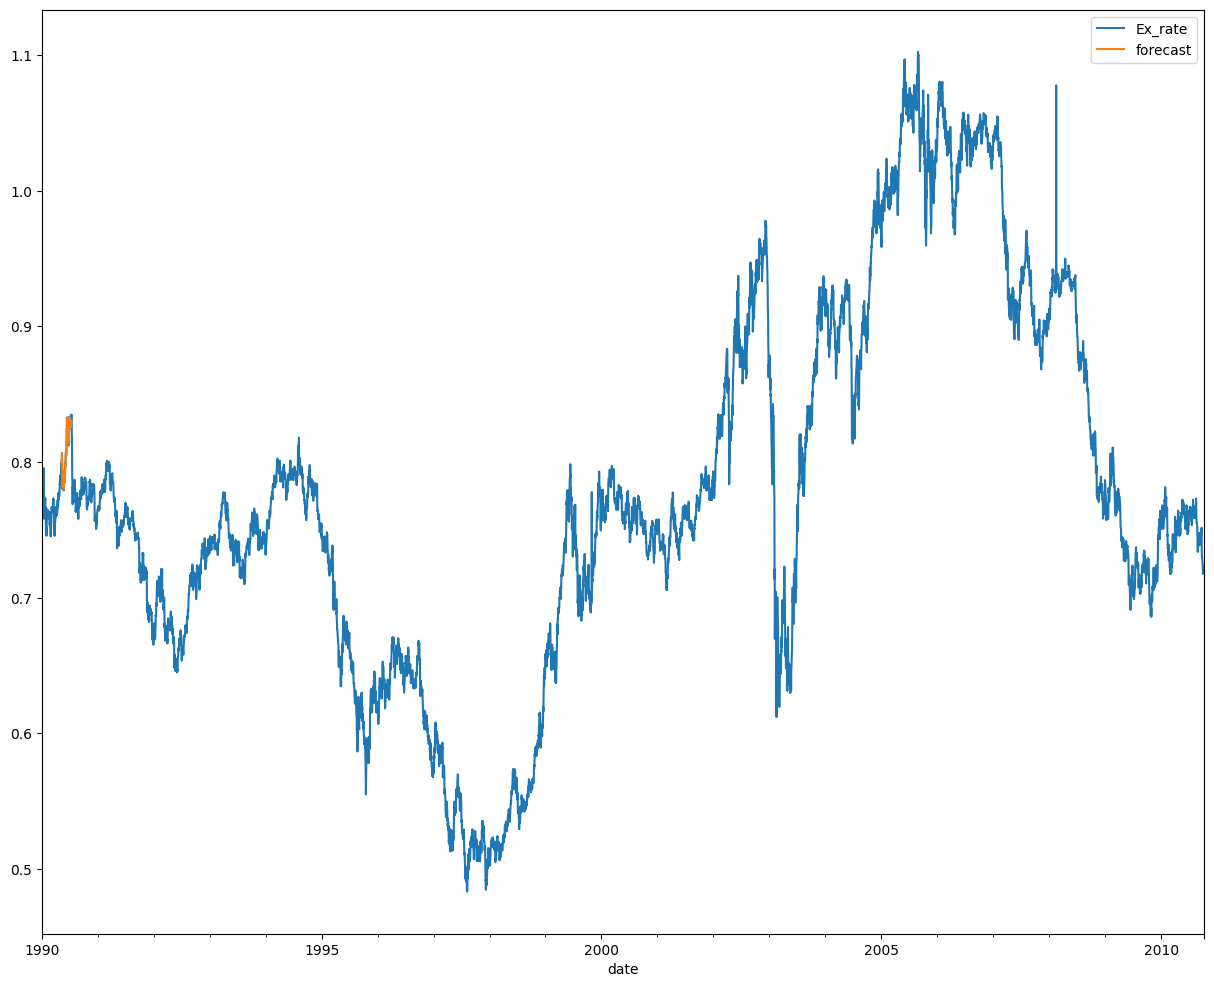

In [37]:
df['forecast'] = fit1.predict(start=130,end=190)
df[['Ex_rate','forecast']].plot(figsize=(15,12))

<Axes: xlabel='date'>

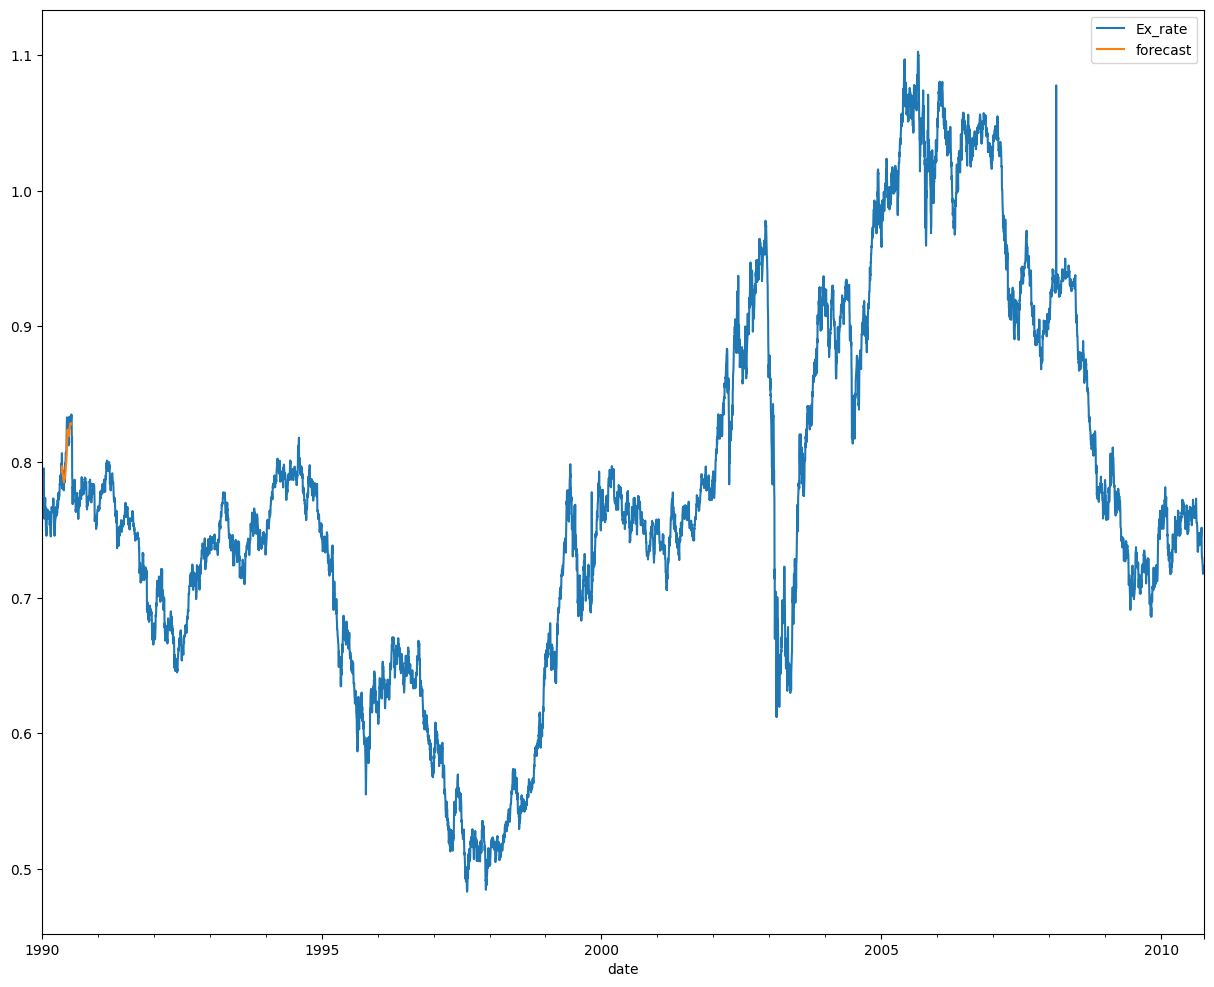

In [38]:
df['forecast'] = fit2.predict(start=130,end=190)
df[['Ex_rate','forecast']].plot(figsize=(15,12))

<Axes: xlabel='date'>

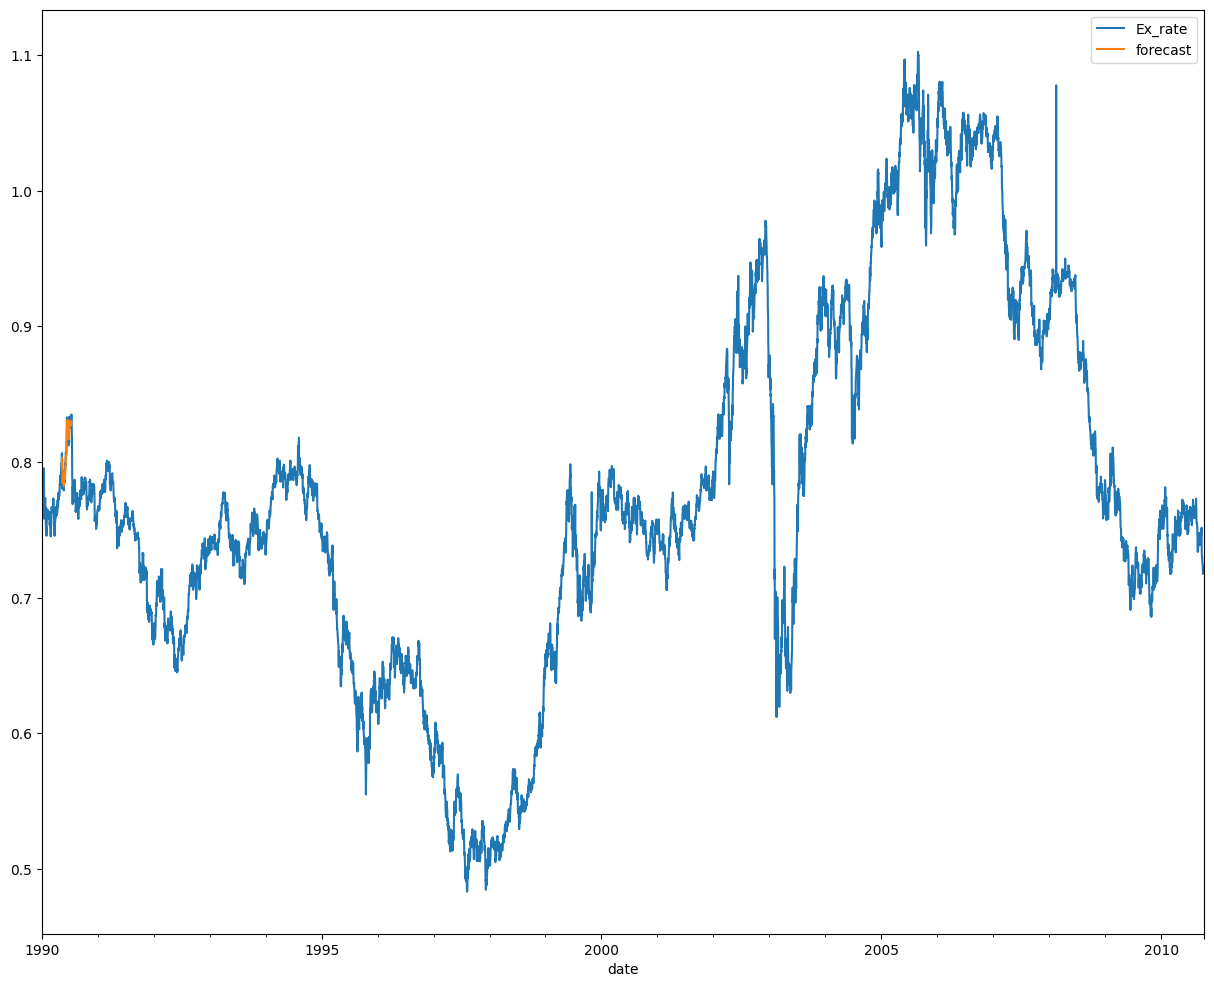

In [39]:
df['forecast'] = fit3.predict(start=130,end=190)
df[['Ex_rate','forecast']].plot(figsize=(15,12))